# Dispersion Surfaces
author: Louis Richard

Script to plot cold plasma dispersion surfaces

In [1]:
import matplotlib.pyplot as plt

from matplotlib import colors
from pyrfu.plot import use_pyrfu_style, plot_surf
from pyrfu.dispersion import disp_surf_calc

use_pyrfu_style(usetex=True)

Load IGRF coefficients ...


## Define the ion-to-electron mass ratio and the electron plasma frequency

In [2]:
m_i = 1836.0  # Ion to electron mass ratio
wp_e = 2  # Electron plasma frequency

## Compute surfaces

In [3]:
kc_x_max, kc_z_max = 4, 4
k_x, k_z, wf_, params_ = disp_surf_calc(kc_x_max, kc_z_max, m_i, wp_e)

## Plot the dispersion surfaces

Text(0.5, 0, '$\\omega / \\omega_{ce}$')

[31-Jan-26 00:13:58] INFO: Substituting symbol \perp from STIXGeneral
[31-Jan-26 00:13:58] INFO: Substituting symbol \perp from STIXGeneral
[31-Jan-26 00:13:58] INFO: Substituting symbol \perp from STIXGeneral
[31-Jan-26 00:13:58] INFO: Substituting symbol \perp from STIXGeneral


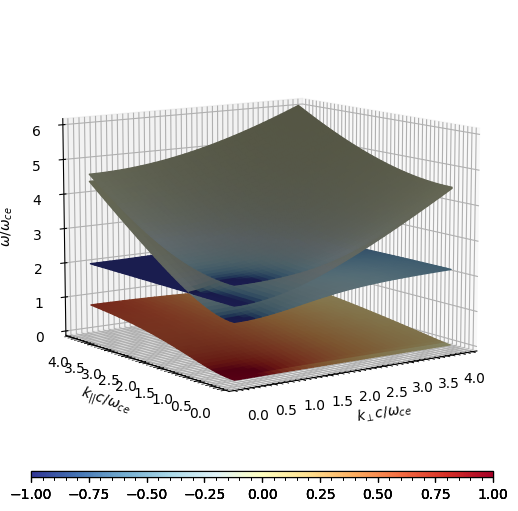

In [4]:
f = plt.figure(figsize=(10, 6))
ax = f.add_subplot(projection="3d")

for n_s in range(6, 10):
    ax, cax = plot_surf(
        ax,
        k_x,
        k_z,
        wf_[n_s, ...],
        params_["Degree of electromagnetism"][n_s, ...],
        plt.cm.RdYlBu_r,
        colors.Normalize(vmin=-1, vmax=1),
        cax_pos="bottom",
    )

ax.zaxis.set_rotate_label(False)
ax.view_init(elev=10.0, azim=-125)
ax.set_ylabel("$k_{||}c / \\omega_{ce}$")
ax.set_xlabel("$k_{\\perp}c / \\omega_{ce}$")
ax.set_zlabel("$\\omega / \\omega_{ce}$", rotation=90)

## Plot the polarization of the electric field and $S_\parallel/S$ for the whistler surface

[31-Jan-26 00:13:58] WARNING: <>:31: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.

[31-Jan-26 00:13:58] WARNING: <>:31: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.

[31-Jan-26 00:13:58] WARNING: /var/folders/z6/4tzcn4qs67j8glvrfvkzlkg80000gn/T/ipykernel_26410/3968932073.py:31: SyntaxWarning: "\p" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\p"? A raw string is also an option.
  caxs101.set_xlabel("$S_\parallel/S$")



Text(0.5, 0.98, '$m_i = 1836$, $\\omega_{pe} / \\omega_{ce} = 2.00$')

[31-Jan-26 00:13:58] INFO: Substituting symbol \perp from STIXGeneral
[31-Jan-26 00:13:58] INFO: Substituting symbol \perp from STIXGeneral
[31-Jan-26 00:13:59] INFO: Substituting symbol \perp from STIXGeneral
[31-Jan-26 00:13:59] INFO: Substituting symbol \perp from STIXGeneral


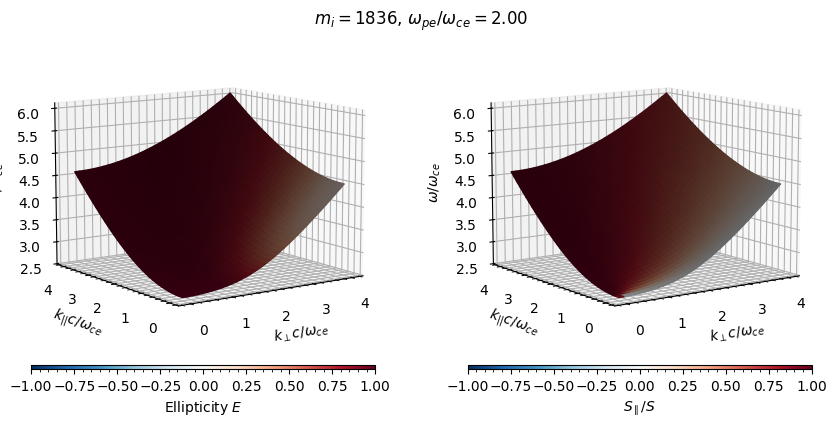

In [5]:
f = plt.figure(figsize=(10, 4))
gsp1 = f.add_gridspec(
    1, 2, wspace=0.15, hspace=0.3, bottom=0.09, top=0.95, left=0.1, right=0.9
)

gsp10 = gsp1[0, :].subgridspec(1, 2, hspace=0.3)

# Create axes in the grid spec
axs10 = [f.add_subplot(gsp10[i], projection="3d") for i in range(2)]

# Ellipticity
axs10[0], caxs100 = plot_surf(
    axs10[0],
    k_x,
    k_z,
    wf_[n_s, ...],
    params_["Ellipticity E"][n_s, ...],
    plt.cm.RdBu_r,
    colors.Normalize(vmin=-1, vmax=1),
    cax_pos="bottom",
)
axs10[0].zaxis.set_rotate_label(False)
axs10[0].view_init(elev=10.0, azim=-125)
axs10[0].set_ylabel("$k_{||}c / \\omega_{ce}$")
axs10[0].set_xlabel("$k_{\\perp}c / \\omega_{ce}$")
axs10[0].set_zlabel("$\\omega / \\omega_{ce}$", rotation=90)
caxs100.set_xlabel("Ellipticity $E$")

# Electron to ion velocity
axs10[1], caxs101 = plot_surf(
    axs10[1],
    k_x,
    k_z,
    wf_[n_s, ...],
    params_[" Spar/Stot"][n_s, ...],
    plt.cm.RdBu_r,
    colors.Normalize(vmin=-1, vmax=1),
    cax_pos="bottom",
)
axs10[1].zaxis.set_rotate_label(False)
axs10[1].view_init(elev=10.0, azim=-125)
axs10[1].set_ylabel("$k_{||}c / \\omega_{ce}$")
axs10[1].set_xlabel("$k_{\\perp}c / \\omega_{ce}$")
axs10[1].set_zlabel("$\\omega / \\omega_{ce}$", rotation=90)
caxs101.set_xlabel("$S_\parallel/S$")


f.suptitle(f"$m_i = {int(m_i):d}$, $\\omega_{{pe}} / \\omega_{{ce}} = {wp_e:3.2f}$")

# plt.savefig("./figure_cold.pdf")